In [14]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("smritisingh1997/species-segmentation-using-iris-dataset")
filename = path + '/iris-dataset.csv'
print("Path to dataset files:", path)

df = pd.read_csv(filename)
df.head()

Path to dataset files: /kaggle/input/species-segmentation-using-iris-dataset


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

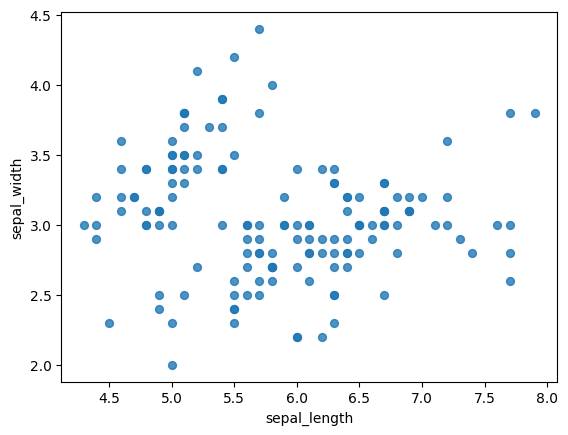

In [15]:
# @title sepal_length vs sepal_width

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

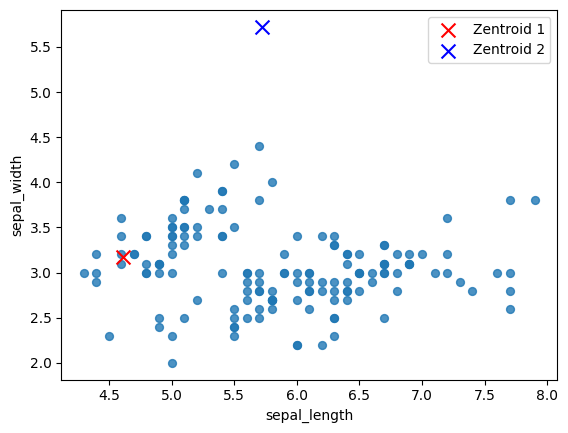

In [16]:

import random

# Generate two random points within the range of sepal_length and sepal_width
sl_min = df['sepal_length'].min()
sl_max = df['sepal_length'].max()
sw_min = df['sepal_width'].min()
sw_max = df['sepal_width'].max()
zentroid1_x = random.uniform(sl_min, sl_max)
zentroid1_y = random.uniform(sw_min, sw_max)

zentroid2_x = random.uniform(sl_min, sl_max)
zentroid2_y = random.uniform(sw_min, sw_max)

# Plot the data points
df.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)

# Plot the random points
plt.scatter(zentroid1_x, zentroid1_y, color='red', marker='x', s=100, label='Zentroid 1')
plt.scatter(zentroid2_x, zentroid2_x, color='blue', marker='x', s=100, label='Zentroid 2')

plt.legend()
plt.show()


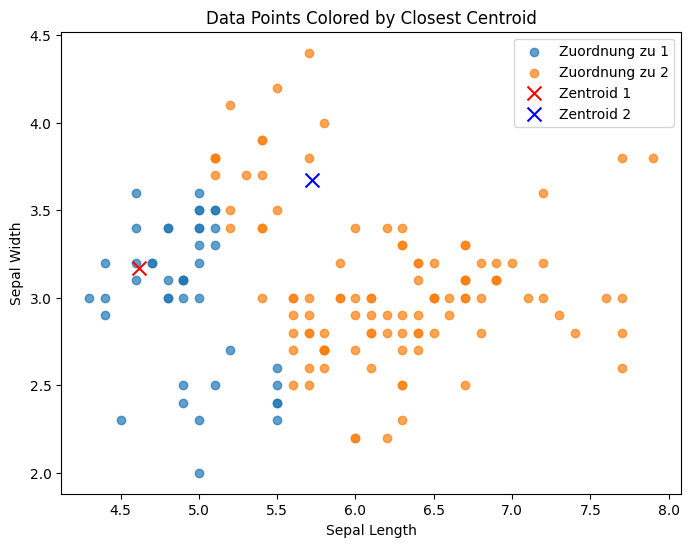

In [17]:
import numpy as np

# Calculate Euclidean distances to both centroids
df['distance_to_centroid1'] = np.sqrt((df['sepal_length'] - zentroid1_x)**2 + (df['sepal_width'] - zentroid1_y)**2)
df['distance_to_centroid2'] = np.sqrt((df['sepal_length'] - zentroid2_x)**2 + (df['sepal_width'] - zentroid2_y)**2)

# Assign points to the nearest centroid
df['closest_centroid'] = np.where(df['distance_to_centroid1'] < df['distance_to_centroid2'], 1, 2)

# Plot the data points, colored by the closest centroid
plt.figure(figsize=(8, 6))
for centroid in [1, 2]:
  subset = df[df['closest_centroid'] == centroid]
  plt.scatter(subset['sepal_length'], subset['sepal_width'], label=f'Zuordnung zu {centroid}', alpha=0.7)

# Plot the random points (centroids)
plt.scatter(zentroid1_x, zentroid1_y, color='red', marker='x', s=100, label='Zentroid 1')
plt.scatter(zentroid2_x, zentroid2_y, color='blue', marker='x', s=100, label='Zentroid 2')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Points Colored by Closest Centroid')
plt.legend()
plt.show()


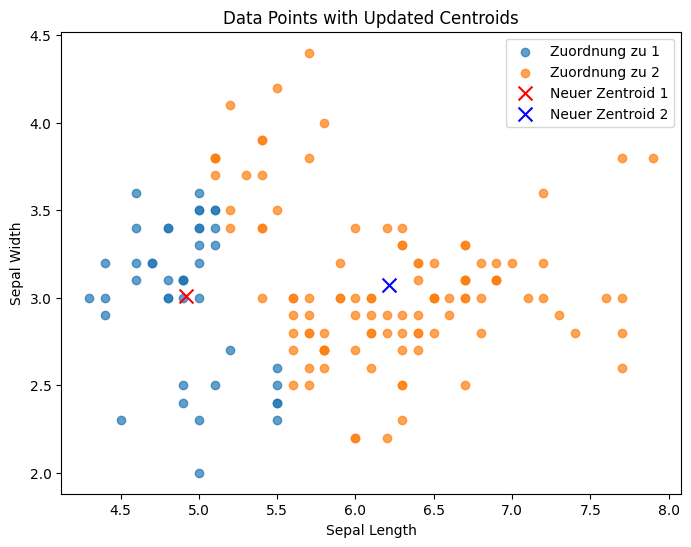

In [18]:
# Calculate new centroid positions
new_centroid1_x = df[df['closest_centroid'] == 1]['sepal_length'].mean()
new_centroid1_y = df[df['closest_centroid'] == 1]['sepal_width'].mean()

new_centroid2_x = df[df['closest_centroid'] == 2]['sepal_length'].mean()
new_centroid2_y = df[df['closest_centroid'] == 2]['sepal_width'].mean()

# Plot the data points, colored by the closest centroid, with updated centroids
plt.figure(figsize=(8, 6))
for centroid in [1, 2]:
  subset = df[df['closest_centroid'] == centroid]
  plt.scatter(subset['sepal_length'], subset['sepal_width'], label=f'Zuordnung zu {centroid}', alpha=0.7)

# Plot the new centroids
plt.scatter(new_centroid1_x, new_centroid1_y, color='red', marker='x', s=100, label='Neuer Zentroid 1')
plt.scatter(new_centroid2_x, new_centroid2_y, color='blue', marker='x', s=100, label='Neuer Zentroid 2')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Points with Updated Centroids')
plt.legend()
plt.show()


Path to dataset files: /kaggle/input/species-segmentation-using-iris-dataset


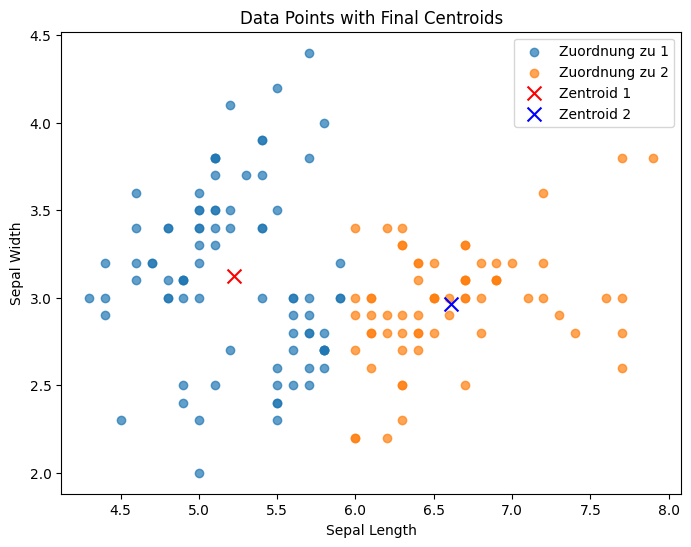

In [19]:
# Der volle kmeans algorithmus mit 10 iterationen

import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np

path = kagglehub.dataset_download("smritisingh1997/species-segmentation-using-iris-dataset")
filename = path + '/iris-dataset.csv'
print("Path to dataset files:", path)

df = pd.read_csv(filename)

# Initialize centroids (you can replace this with your preferred initialization)
zentroid1_x = random.uniform(df['sepal_length'].min(), df['sepal_length'].max())
zentroid1_y = random.uniform(df['sepal_width'].min(), df['sepal_width'].max())
zentroid2_x = random.uniform(df['sepal_length'].min(), df['sepal_length'].max())
zentroid2_y = random.uniform(df['sepal_width'].min(), df['sepal_width'].max())

# Function to calculate Euclidean distance
def euclid(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# K-means iterations
for _ in range(10):  # Number of iterations
    # Calculate distances to centroids
    dist_func_1 = lambda row: euclid(row['sepal_length'], row['sepal_width'], zentroid1_x, zentroid1_y)
    dist_func_2 = lambda row: euclid(row['sepal_length'], row['sepal_width'], zentroid2_x, zentroid2_y)
    df['dist_to_1'] = df.apply(dist_func_1, axis=1)
    df['dist_to_2'] = df.apply(dist_func_2, axis=1)

    # Assign points to the nearest centroid
    df['closest_centroid'] = np.where(df['dist_to_1'] < df['dist_to_2'], 1, 2)

    # Update centroids
    new_centroid1_x = df[df['closest_centroid'] == 1]['sepal_length'].mean()
    new_centroid1_y = df[df['closest_centroid'] == 1]['sepal_width'].mean()
    new_centroid2_x = df[df['closest_centroid'] == 2]['sepal_length'].mean()
    new_centroid2_y = df[df['closest_centroid'] == 2]['sepal_width'].mean()

    # Check for convergence (optional)
    if (abs(new_centroid1_x- zentroid1_x) < 0.01 and
       abs(new_centroid1_y - zentroid1_y) < 0.01 and
       abs(new_centroid2_x - zentroid2_x) < 0.01 and
       abs(new_centroid2_y - zentroid2_y) < 0.01) :
       break

    zentroid1_x = new_centroid1_x
    zentroid1_y = new_centroid1_y
    zentroid2_x = new_centroid2_x
    zentroid2_y = new_centroid2_y

# Plot the final result
plt.figure(figsize=(8, 6))
for centroid in [1, 2]:
    subset = df[df['closest_centroid'] == centroid]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=f'Zuordnung zu {centroid}', alpha=0.7)

plt.scatter(zentroid1_x, zentroid1_y, color='red', marker='x', s=100, label='Zentroid 1')
plt.scatter(zentroid2_x, zentroid2_y, color='blue', marker='x', s=100, label='Zentroid 2')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Points with Final Centroids')
plt.legend()
plt.show()


Path to dataset files: /kaggle/input/species-segmentation-using-iris-dataset


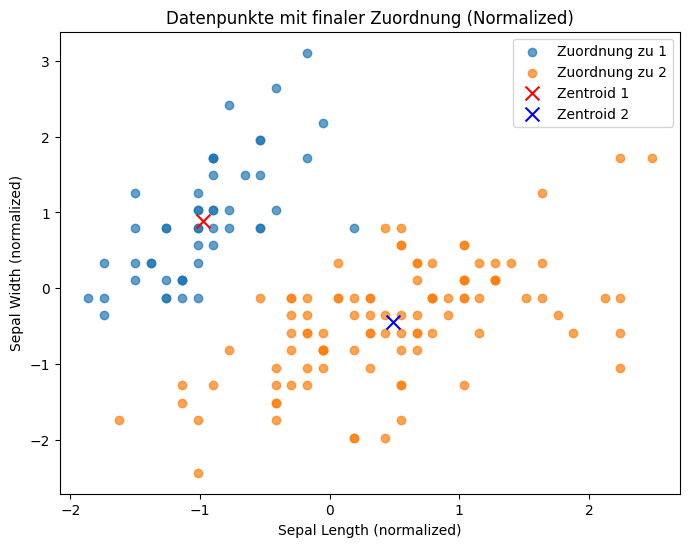

In [20]:

import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import StandardScaler

# Download the dataset
path = kagglehub.dataset_download("smritisingh1997/species-segmentation-using-iris-dataset")
filename = path + '/iris-dataset.csv'
print("Path to dataset files:", path)

df = pd.read_csv(filename)

# Normalize data using Z-score
for column in ['sepal_length', 'sepal_width']:
    df[column] = (df[column] - df[column].mean()) / df[column].std()


# Initialize centroids
zentroid1_x = random.uniform(df['sepal_length'].min(), df['sepal_length'].max())
zentroid1_y = random.uniform(df['sepal_width'].min(), df['sepal_width'].max())
zentroid2_x = random.uniform(df['sepal_length'].min(), df['sepal_length'].max())
zentroid2_y = random.uniform(df['sepal_width'].min(), df['sepal_width'].max())

# Euclidean distance function
def euclid(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# K-means iterations
for _ in range(100):
    # Calculate distances
    dist_func_1 = lambda row: euclid(row['sepal_length'], row['sepal_width'], zentroid1_x, zentroid1_y)
    dist_func_2 = lambda row: euclid(row['sepal_length'], row['sepal_width'], zentroid2_x, zentroid2_y)
    df['dist_to_1'] = df.apply(dist_func_1, axis=1)
    df['dist_to_2'] = df.apply(dist_func_2, axis=1)

    # Assign points to nearest centroid
    df['closest_centroid'] = np.where(df['dist_to_1'] < df['dist_to_2'], 1, 2)

    # Update centroids
    new_centroid1_x = df[df['closest_centroid'] == 1]['sepal_length'].mean()
    new_centroid1_y = df[df['closest_centroid'] == 1]['sepal_width'].mean()
    new_centroid2_x = df[df['closest_centroid'] == 2]['sepal_length'].mean()
    new_centroid2_y = df[df['closest_centroid'] == 2]['sepal_width'].mean()

    # Convergence check
    if abs(new_centroid1_x - zentroid1_x) < 0.01 and \
       abs(new_centroid1_y - zentroid1_y) < 0.01 and \
       abs(new_centroid2_x - zentroid2_x) < 0.01 and \
       abs(new_centroid2_y - zentroid2_y) < 0.01:
        break

    zentroid1_x = new_centroid1_x
    zentroid1_y = new_centroid1_y
    zentroid2_x = new_centroid2_x
    zentroid2_y = new_centroid2_y

# Plot results
plt.figure(figsize=(8, 6))
for centroid in [1, 2]:
    subset = df[df['closest_centroid'] == centroid]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=f'Zuordnung zu {centroid}', alpha=0.7)

plt.scatter(zentroid1_x, zentroid1_y, color='red', marker='x', s=100, label='Zentroid 1')
plt.scatter(zentroid2_x, zentroid2_y, color='blue', marker='x', s=100, label='Zentroid 2')
plt.xlabel('Sepal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.title('Datenpunkte mit finaler Zuordnung (Normalized)')
plt.legend()
plt.show()
